In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# showing all columns and rows of the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\anxaa\OneDrive\Documents\My Project Datasets\employee_train.csv",index_col=0)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
S.No,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## **Understanding the data:**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 1 to 1048
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1048 non-null   object
 1   Age                        1048 non-null   int64 
 2   Gender                     1048 non-null   object
 3   Country                    1048 non-null   object
 4   state                      636 non-null    object
 5   self_employed              1030 non-null   object
 6   family_history             1048 non-null   object
 7   treatment                  1048 non-null   object
 8   work_interfere             812 non-null    object
 9   no_employees               1048 non-null   object
 10  remote_work                1048 non-null   object
 11  tech_company               1048 non-null   object
 12  benefits                   1035 non-null   object
 13  care_options               1048 non-null   object
 14  wellness_prog

In [4]:
df.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

## **Data Preprocessing:**

In [5]:
# converting timestamp to datetime format

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

### Returning the unique values of the columns:


In [6]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print("unique values:\n",i)
        print(df[i].unique())
        print('\n')

Gender
Male                        518
male                        162
M                           100
Female                       99
female                       48
F                            33
m                            30
f                            13
Make                          4
Female                        2
Cis Male                      2
Woman                         2
Female (trans)                2
Man                           2
Male                          1
Agender                       1
cis-female/femme              1
Guy (-ish) ^_^                1
male leaning androgynous      1
A little about you            1
Mail                          1
Female (cis)                  1
msle                          1
Neuter                        1
Androgyne                     1
queer                         1
cis male                      1
Trans woman                   1
Nah                           1
Genderqueer                   1
fluid                         1
E

### Dealing with Gender column:

In [7]:
male_entries = ["Male","male","M","m","make","Cis Male","Mal","Male (CIS)","Man","maile", "something kinda male?", "Male ",
       "msle", "cis male","male-","male ","Malr","Male-ish","Guy (-ish) ^_^","male leaning androgynous","Mail","Make"]
female_entries = ["Female","female","F","f","woman","Woman","Femake","Female ","Female (cis)","Trans-female","cis-female/femme","Female (trans)","Cis Female","Trans woman"]

In [8]:
df["Gender"]= df["Gender"].replace(male_entries,"Male")
df["Gender"] = df["Gender"].replace(female_entries,"Female")

In [9]:
df["Gender"].unique()

array(['Female', 'Male', 'queer/she/they', 'non-binary', 'Nah', 'All',
       'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Neuter',
       'queer', 'A little about you'], dtype=object)

In [10]:
others = [ 'queer/she/they', 'non-binary',
       'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne',
       'Agender', 'Neuter', 'queer',
       'A little about you']
df["Gender"] = df["Gender"].replace(others,"Others")

In [11]:
df["Gender"].value_counts()

Gender
Male      830
Female    206
Others     12
Name: count, dtype: int64

### Dealing with State Column:

In [12]:
df.loc[df['state'].isnull(),"Country"].value_counts()

Country
United Kingdom            153
Canada                     64
Germany                    37
Netherlands                18
Australia                  18
Ireland                    13
France                     11
United States              11
India                       8
New Zealand                 6
Sweden                      6
Italy                       6
Switzerland                 6
Poland                      5
Brazil                      5
Belgium                     4
South Africa                4
Mexico                      3
Israel                      3
Austria                     3
Russia                      3
Bulgaria                    3
Singapore                   2
Finland                     2
Denmark                     2
Portugal                    2
Romania                     1
Colombia                    1
Spain                       1
Uruguay                     1
Costa Rica                  1
Bosnia and Herzegovina      1
Hungary                     1
Sl

In [13]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The'], dtype=object)

In [14]:
df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [15]:
# Create a mapping dictionary
country_state_map = {
    'United States': 'US',
    'Canada': 'CA',
    'United Kingdom': 'UK',
    'Bulgaria': 'BG',
    'France': 'FR',
    'Portugal': 'PT',
    'Netherlands': 'NL',
    'Switzerland': 'CH',
    'Poland': 'PL',
    'Australia': 'AU',
    'Germany': 'DE',
    'Russia': 'RU',
    'Mexico': 'MX',
    'Brazil': 'BR',
    'Slovenia': 'SI',
    'Costa Rica': 'CR',
    'Austria': 'AT',
    'Ireland': 'IE',
    'India': 'IN',
    'South Africa': 'ZA',
    'Italy': 'IT',
    'Sweden': 'SE',
    'Colombia': 'CO',
    'Latvia': 'LV',
    'Romania': 'RO',
    'Belgium': 'BE',
    'New Zealand': 'NZ',
    'Zimbabwe': 'ZW',
    'Spain': 'ES',
    'Finland': 'FI',
    'Uruguay': 'UY',
    'Israel': 'IL',
    'Bosnia and Herzegovina': 'BA',
    'Hungary': 'HU',
    'Singapore': 'SG',
    'Japan': 'JP',
    'Nigeria': 'NG',
    'Croatia': 'HR',
    'Norway': 'NO',
    'Thailand': 'TH',
    'Denmark': 'DK',
    'Bahamas, The': 'BS'
}

#  Map the country to state only where 'state' is null
# mask = df['state'].isnull()
# df.loc[mask, 'state'] = df.loc[mask, 'country'].map(country_state_map)


In [16]:
df['state'] = df['state'].fillna(df['Country'].map(country_state_map))


In [17]:
df.state.isnull().sum()

0

In [18]:
df.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                          0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          4
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64

In [19]:
# Filling missing values in Work Interfere column

df.work_interfere = df.work_interfere.fillna("Not Known")
df.work_interfere.value_counts()

work_interfere
Sometimes    386
Not Known    236
Never        178
Rarely       144
Often        104
Name: count, dtype: int64

In [20]:
# Filling missing values in Self Employed column
df.self_employed = df.self_employed.fillna(df.self_employed.mode()[0])
df.self_employed.value_counts()

self_employed
No     924
Yes    124
Name: count, dtype: int64

In [21]:
df.benefits.value_counts()

benefits
Yes           400
Don't know    329
No            306
Name: count, dtype: int64

In [22]:
df.benefits = df.benefits.fillna("Don't know")
df.benefits.value_counts()

benefits
Yes           400
Don't know    342
No            306
Name: count, dtype: int64

In [23]:
df.drop(columns="comments",inplace=True)
df.drop(columns="Timestamp",inplace=True)  # dropping this because later found that it will just add noise to the data


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 1 to 1048
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1048 non-null   int64 
 1   Gender                     1048 non-null   object
 2   Country                    1048 non-null   object
 3   state                      1048 non-null   object
 4   self_employed              1048 non-null   object
 5   family_history             1048 non-null   object
 6   treatment                  1048 non-null   object
 7   work_interfere             1048 non-null   object
 8   no_employees               1048 non-null   object
 9   remote_work                1048 non-null   object
 10  tech_company               1048 non-null   object
 11  benefits                   1048 non-null   object
 12  care_options               1048 non-null   object
 13  wellness_program           1044 non-null   object
 14  seek_help    

### Dealing with Age Column

In [25]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8],
      dtype=int64)

In [26]:
df = df.drop(df[(df["Age"] < 0) | (df["Age"] > 100)].index)

In [27]:
df.Age.unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8], dtype=int64)

In [28]:
df = df.dropna(axis=0,how="any")   # left with some null values (8) thats why got the need to remove them.

In [29]:
df.isnull().sum() 

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [30]:
df.head(10)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
S.No,,,,,,,,,,,,,,,,,,,,,,,,,
1,37,Female,United States,IL,No,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
3,32,Male,Canada,CA,No,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
4,31,Male,United Kingdom,UK,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
5,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
6,33,Male,United States,TN,No,Yes,No,Sometimes,25-Jun,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
7,35,Female,United States,MI,No,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
8,39,Male,Canada,CA,No,No,No,Never,5-Jan,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
9,42,Female,United States,IL,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No


In [31]:
df.shape

(1036, 25)

In [32]:
df.drop(columns="no_employees", inplace=True) # redundancy

In [33]:
colname = []
for i in df.columns:
    if df[i].dtype == "object":
        colname.append(i)
colname

['Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [34]:
# using label encoder to convert categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in colname:
    df[i] = le.fit_transform(df[i])
df.head(10)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
S.No,,,,,,,,,,,,,,,,,,,,,,,,
1,37,0,39,26,0,0,1,2,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
2,44,1,39,27,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,32,1,7,8,0,0,0,3,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
4,31,1,38,69,0,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
5,31,1,39,68,0,0,0,0,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0
6,33,1,39,67,0,1,0,4,0,1,2,1,1,0,0,0,1,1,2,2,1,0,0,0
7,35,0,39,36,0,1,1,4,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0
8,39,1,7,8,0,0,0,0,1,1,1,2,1,1,2,0,1,1,0,0,1,1,1,0
9,42,0,39,26,0,1,1,4,0,1,2,2,1,1,1,3,0,1,2,2,1,0,1,0


## **Time to build the model:**

In [35]:
# Ensure df is a pandas DataFrame before using the drop method
# if isinstance(df, np.ndarray):
	# df = pd.DataFrame(df, columns=colname)

X = df.drop("treatment", axis=1)
Y = df["treatment"]
print(X.shape, Y.shape)


(1036, 23) (1036,)


<Axes: title={'center': 'Correlation Matrix'}>

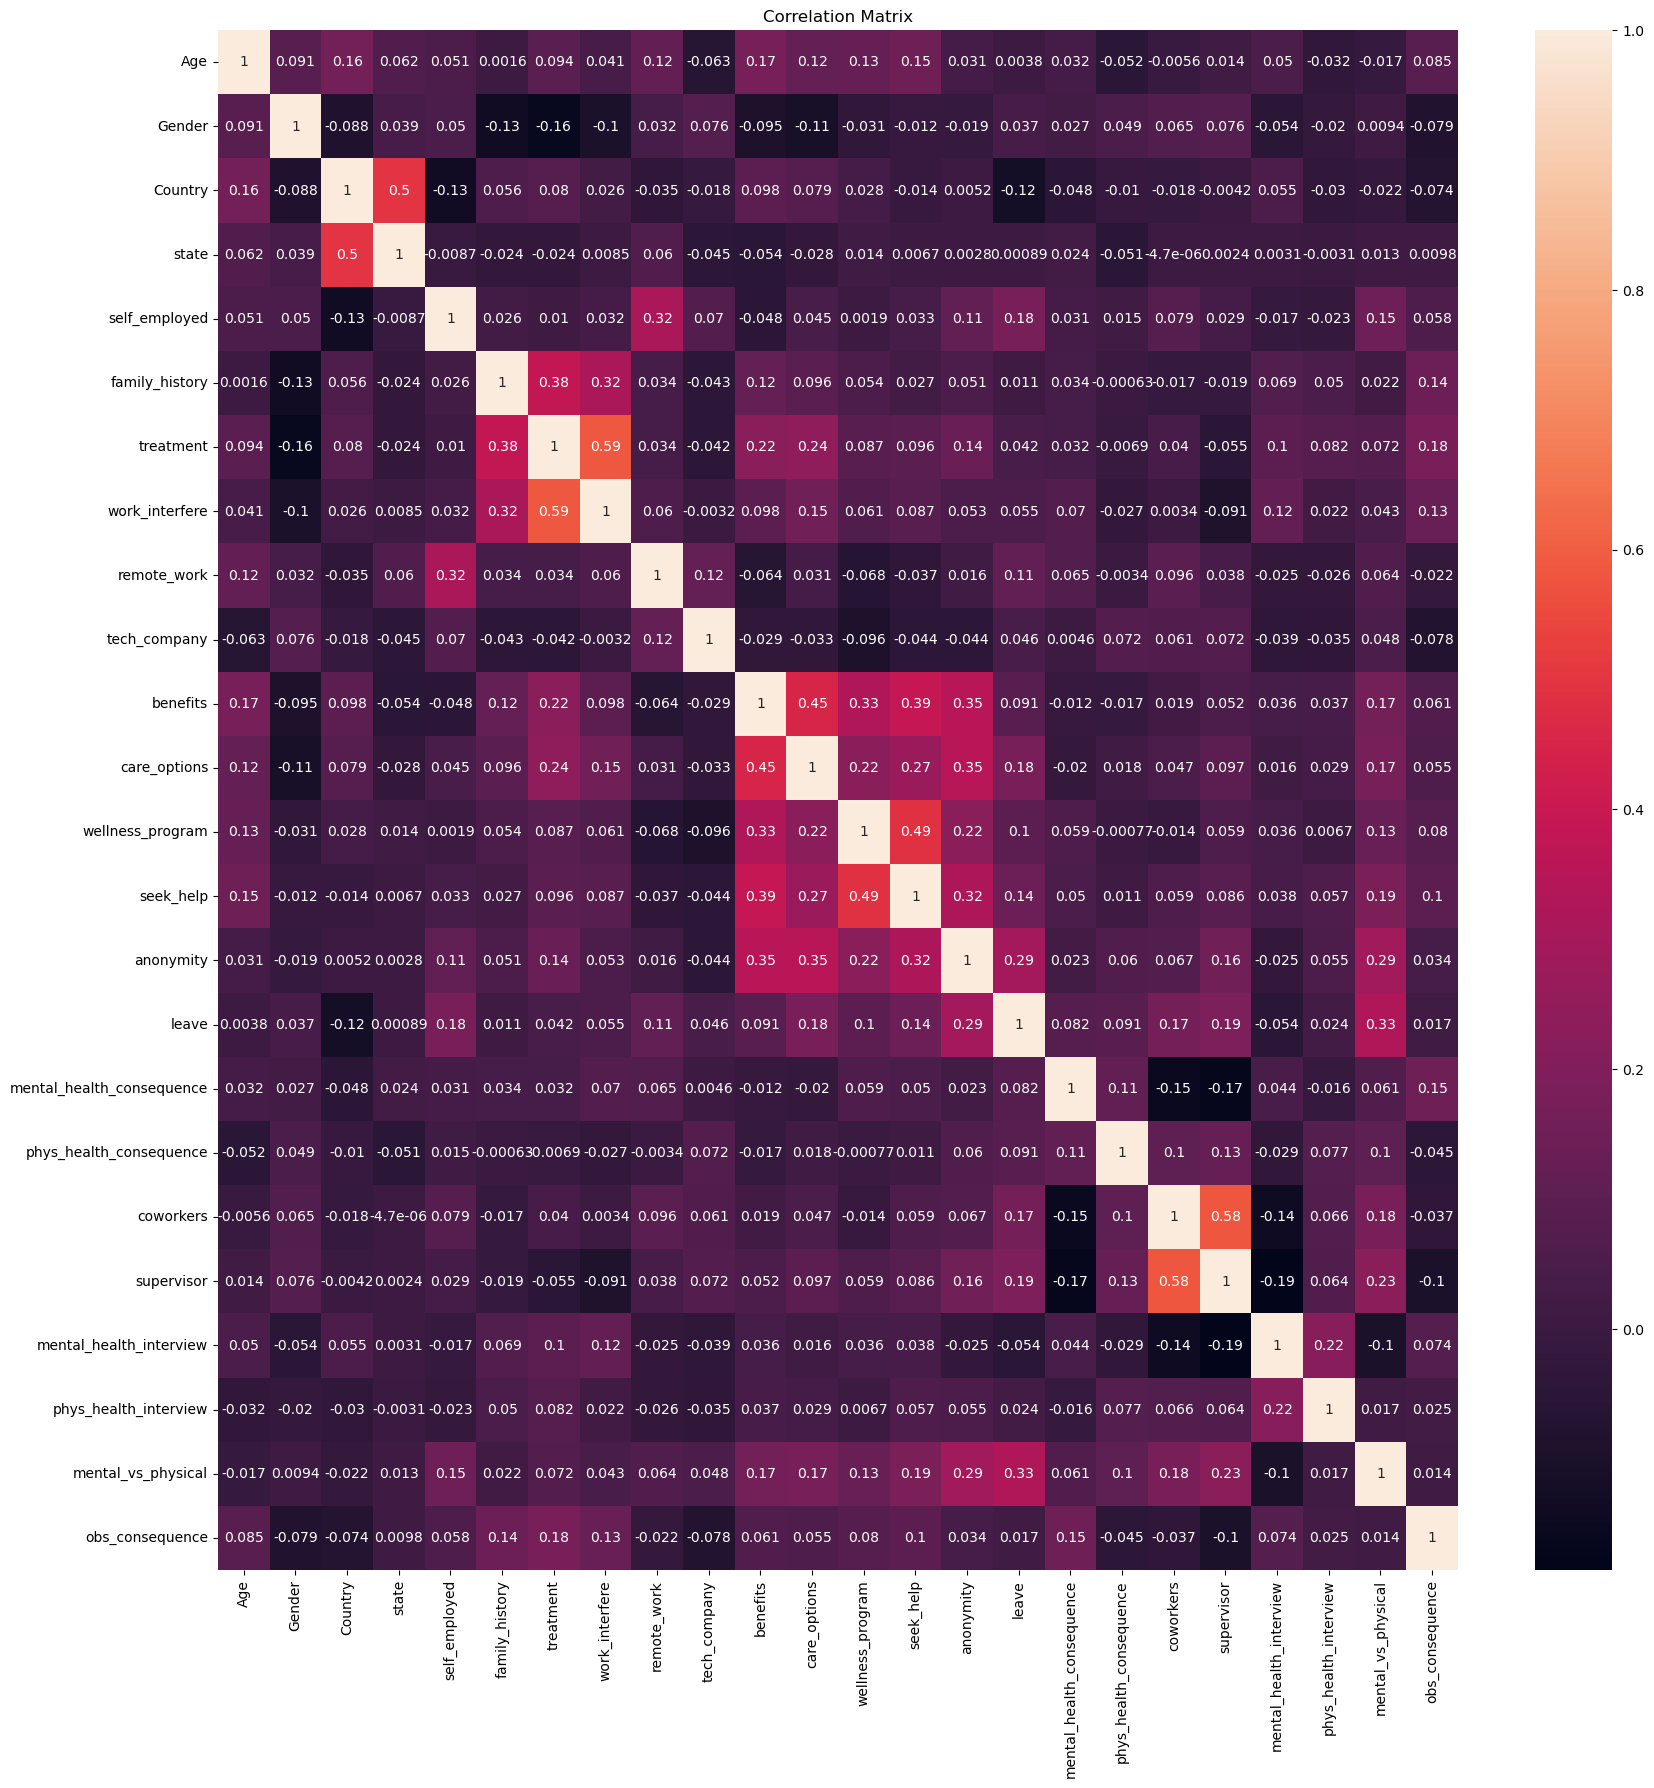

In [36]:
df.corr()
# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True)

In [37]:
# Creating Logistic Regression Model:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
# Using confusion matrix to check the accuracy of the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Ensure predictions are made before evaluating the model
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))



Confusion Matrix:
[[117  42]
 [ 25 127]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       159
           1       0.75      0.84      0.79       152

    accuracy                           0.78       311
   macro avg       0.79      0.79      0.78       311
weighted avg       0.79      0.78      0.78       311

Accuracy: 0.7845659163987139


In [39]:
# Creating Random Forest Classifier Model:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=11,criterion="gini", random_state=10)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(min_samples_leaf=11, random_state=10)

In [40]:
y_pred = rf_model.predict(X_test)

In [41]:
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))


Confusion Matrix:
[[117  42]
 [ 25 127]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       159
           1       0.75      0.84      0.79       152

    accuracy                           0.78       311
   macro avg       0.79      0.79      0.78       311
weighted avg       0.79      0.78      0.78       311

Accuracy: 0.7845659163987139


# Tuning the Random Forest Classifier Model:

#### **Cross Validation**

In [42]:
# using k-fold cross validation to check the accuracy of the model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=10, shuffle=True)
results = cross_val_score(rf_model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.710% (2.951%)


### **Recursive Feature Elimination (RFE)** 

In [62]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X and Y are ready
X = pd.DataFrame(X)  # Ensuring X is a DataFrame if it’s not already

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=15, step=1)  # Select top 15 features
rfe.fit(X, Y)

selected_features = X.columns[rfe.support_]

# New reduced X
X_selected = X[selected_features]

print(selected_features)


Index(['Age', 'Gender', 'Country', 'state', 'family_history', 'work_interfere',
       'benefits', 'care_options', 'seek_help', 'leave',
       'mental_health_consequence', 'coworkers', 'supervisor',
       'phys_health_interview', 'mental_vs_physical'],
      dtype='object')


In [66]:
# Creating Model with selected features
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [67]:
# predicting the test set results
Y_pred = model.predict(X_test)

In [ ]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:") 
print(cm)
print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))  

Confusion Matrix:
[[119  40]
 [ 19 133]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.77      0.88      0.82       152

    accuracy                           0.81       311
   macro avg       0.82      0.81      0.81       311
weighted avg       0.82      0.81      0.81       311

Accuracy: 0.8102893890675241


### The overall best model across all the models that I have built logistic regression using Recussive Feature Elimination came out to be the best model with an accuracy of **81.02%** and the recall of **88%** and the precision of **82%** on the class of **1** class of importance.